<a href="https://colab.research.google.com/github/nurdankar/ConvolutionalNeuralNetworkTrainingWithKeras/blob/master/VGG16_NesneTan%C4%B1ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VGG16 İLE NESNE TANIMA(OBJECT DETECTION WITH VGG16) - IMAGENET

#Kimlik Doğrulama, Dosya/Klasör Kontrolleri


In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [55]:
import os
os.chdir('/gdrive/My Drive')
!ls

 Calısma_Ortamı  'Colab Notebooks'


In [56]:
import os
os.chdir('/gdrive/My Drive/Calısma_Ortamı/NesneTanıma')
!ls

ımages	VGG16-NesneTanıma.ipynb


In [57]:
import os
os.chdir("/gdrive/My Drive/Calısma_Ortamı/NesneTanıma")
!pwd

/gdrive/My Drive/Calısma_Ortamı/NesneTanıma


In [58]:
import os
os.chdir('/gdrive/My Drive/Calısma_Ortamı/NesneTanıma/ımages')
!ls

pencil.jpg  plant1.jpg	plant2.jpg  plant3.jpg	prenses.jpg  staple.jpg


# Kütüphane Kurulumu

In [59]:
!pip3 install -q keras

# Keras Kütüphanesinden Eğitilmiş VGG16 Modelinin İmport Edilmesi

In [60]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

#Keras Kütüphanesinde Önceden Eğitilmiş Olan ImageNet Veri Kümesinin Yüklenmesi

In [61]:
model = VGG16(weights='imagenet', include_top=True)

#Model Yapısının İncelenmesi

## Katmanlar

In [62]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'block1_conv1/Relu_1:0' shape=(None, 224, 224, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu_1:0' shape=(None, 224, 224, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool_1:0' shape=(None, 112, 112, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu_1:0' shape=(None, 112, 112, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu_1:0' shape=(None, 112, 112, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool_1:0' shape=(None, 56, 56, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu_1:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu_1:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu_1:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool_1:0' shape=(None, 28, 28, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1/Relu_1:0

## Parametre Sayısı

In [63]:
model.count_params()

138357544

# Test Görüntülerinin Kontrolü

In [64]:
import os
os.chdir("/gdrive/My Drive/Calısma_Ortamı/NesneTanıma/ımages")
!pwd

/gdrive/My Drive/Calısma_Ortamı/NesneTanıma/ımages


In [65]:
!ls "/gdrive/My Drive/Calısma_Ortamı/NesneTanıma/ımages"

pencil.jpg  plant1.jpg	plant2.jpg  plant3.jpg	prenses.jpg  staple.jpg


# Bir Test Resminin Yüklenmesi ve İlgili Ön İşlemler

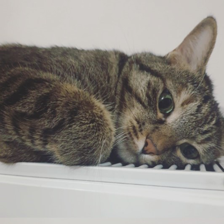

In [66]:
image_path =  'prenses.jpg'
image = Image.open(image_path)
image = image.resize((224, 224))
image

In [67]:
x = np.asarray(image, dtype='float32')              # Görüntüyü diziye çevirme
x = np.expand_dims(x, axis=0)                       # Dizi listesine çevirme
x = preprocess_input(x)                             # Giriş görüntüsünün eğitim setine uygun şekilde ön işlemlerinin yapılması

# Test Görüntüsü İle Sınıflandırma Yapılması

In [68]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top = 5)[0])

Predicted: [('n02123045', 'tabby', 0.4280353), ('n02123159', 'tiger_cat', 0.15688364), ('n02124075', 'Egyptian_cat', 0.04170999), ('n04553703', 'washbasin', 0.031559445), ('n04004767', 'printer', 0.026477348)]


In [69]:
print(decode_predictions(preds, top = 1)[0][0][1])

tabby
